In [1]:
# importing
import sys
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Muon decay, for ease of code, microseconds will be the standard
tau = 2.2

In [3]:
# BOX METHOD - WILL BE USING THIS
   # Produce probability density function
def exp_pdf(x,tau):
    pdf_val = (1/tau)*np.exp(-x/tau)
    return pdf_val

In [4]:
# Create a simulation function that scales to whatever value of tau that is needed, between 0 and upper limit
def mu_sims(runs, tau, upperlim):
        # Create list of pdf results
    pdf_list = []
        # Create values for upper and lower limits required by the box random generator
    l_limit = 0
    h_limit = 1
        # find f_max by taking exponent at maximum and multiplying by 1.1
        # 1.1 chosen arbitrarily as it makes it larger than max value of f
    f_max = exp_pdf(0,tau) * 1.1

        # Create N random muon decays across 10 microseconds
    while (len(pdf_list) < runs):
            # generate random number within our pdf range scale between 0 and our upperlimit (of 10)
        x1 = np.random.uniform(low = l_limit, high = h_limit*upperlim)
            # Apply our pdf
        y1 = exp_pdf(x1,tau)
            # generate second random number scale between 0 and our f_max
        y2 = np.random.uniform(low = l_limit, high = h_limit*f_max)

            # Check if y2 < y1. If so, add to list
        if (y2 < y1):
            pdf_list.append(x1)
        else:
            continue;
            
    return pdf_list
   
        

The mean for our 1000 simulated muon decays is given as 2.167us.
This (should be) in close agreement with our tau value of 2.2us.


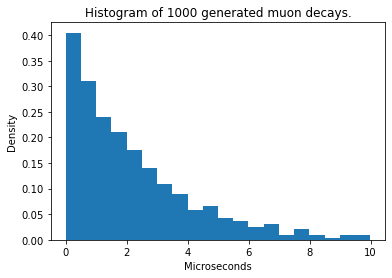

In [5]:
# Run our simulation for 1000 runs
pdf_list = mu_sims(1000, tau, 10)

    # Calculate the mean which gives the estimate of tau
print("The mean for our {} simulated muon decays is given as {:.3f}us.\nThis (should be) in close agreement with our tau value of {}us.".format(len(pdf_list),np.mean(pdf_list),tau))
    # Print histogram of pdf_list and describe the results
plt.title("Histogram of 1000 generated muon decays.")
plt.xlabel("Microseconds")
plt.ylabel("Density")
plt.hist(pdf_list, bins = 20, density = True)
plt.show()

In [6]:
# NUMPY - THIS METHOD WONT BE USED AS I WANT TO RESTRICT WITHIN RANGE 0->10

    # Use numpy to generate exponential distribution for 1000 points.
##edist = np.random.exponential(tau,1000)

    # Calculate the mean which gives the estimate of tau
##print("The mean is given as {:.3f}us, which is in close agreement with our tau value.".format(np.mean(edist)))
    # Plot histogram of distribution
##plt.title("Histogram of 1000 generated muon decays.")
##plt.xlabel("Microseconds")
##plt.ylabel("Density")
##plt.hist(edist, bins = 20, density = True)
##plt.show()

## The value isn't quite the same, and as is referenced in the sheet is always a little lower than the expected value for decay.

## The reason our tau estimate is lower than expected is because we limit our exponential distribution to within 10 microseconds, so we remove the tail of the distribution (as the exponential distribution would continue to infinity) and therefore the result of shifted to smaller values.


In [16]:
# Repeat the whole experiment 500 times and calculate the estimate of tau for each

    # Tau esimate array
tau_est = []

for i in range(500):
        # Run simulation
    pdf_list = mu_sims(1000, tau, 10)
        # Append to list
    tau_est.append(np.mean(pdf_list))



500


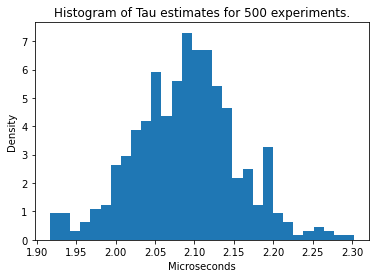

In [17]:
# Plot 
plt.title("Histogram of Tau estimates for 500 experiments.")
plt.xlabel("Microseconds")
plt.ylabel("Density")
plt.hist(tau_est, bins = 30, density = True)
plt.show()

In [19]:
# Calculating statistical values of importance
    # mean
t_mean = np.mean(tau_est)
    # standard deviation
t_std = np.std(tau_est)
    # bias
bias = tau - t_mean
    # precision on the bias
error_on_mean = t_std/np.sqrt(len(tau_est))
    # sigma from mean
sig_from_mean = bias/t_std

print("Mean muon lifetime estimate for single experiment: {:.3f}us\nStandard Deviation: {:.3f}us\nBias against true lifetime: {:.3f}us\nNumber of Sigma from true lifetime: {:.3f}\nStandard error on the Mean: {:.3f}us".format(t_mean,t_std,bias,sig_from_mean,error_on_mean))


Mean muon lifetime estimate for single experiment: 2.089us
Standard Deviation: 0.066us
Bias against true lifetime: 0.111us
Number of Sigma from true lifetime: 1.679
Standard error on the Mean: 0.003us


## What did we learn from this distribution?

It appears to be a gaussian distribution.
We can determine the numerical precision for one experiment to be the standard deviation of our gaussian distribution, which is calculated above (in this run, as 0.060).

Our method has the bias described earlier, due to cutting off the exponential distribution at 10 microseconds. This gives us a bias in our measurements that is calculated above (in this run, as 0.112us)

The precision on the bias can be taken as the standard error on the mean, and in this case is the result 0.003us.